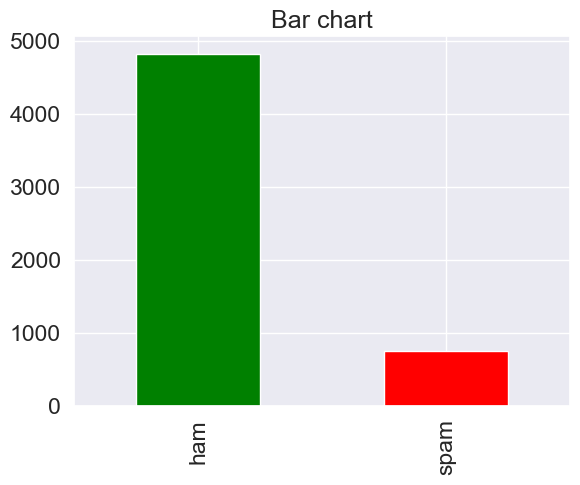

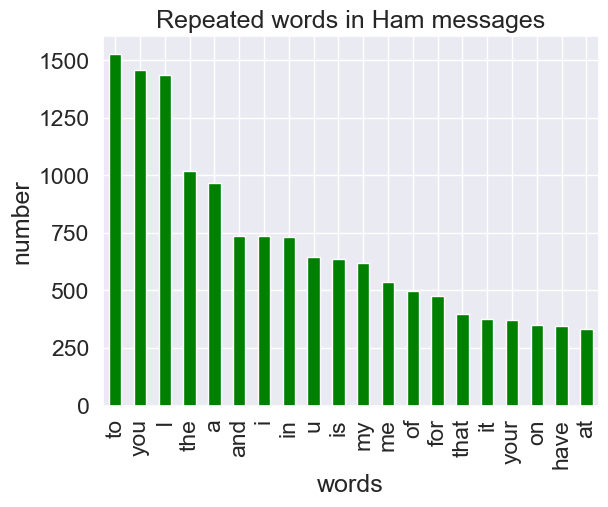

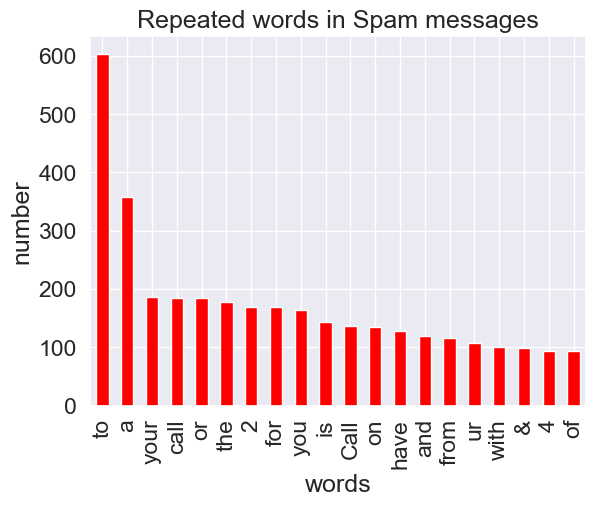

confusion matrix for naive bayes
 [[1587    0]
 [  56  196]]
[0.8957529  0.89393939 0.90076336 0.90076336 0.90076336 0.8973384
 0.89694656 0.90310078 0.90310078 0.90625    0.91699605 0.92063492
 0.92430279 0.93927126 0.93927126 0.94308943 0.94308943 0.94308943
 0.94693878 0.94650206 0.94650206 0.94650206 0.94628099 0.94628099
 0.95020747 0.95       0.9539749  0.96186441 0.96186441 0.96581197
 0.96551724 0.96551724 0.96551724 0.96536797 0.96536797 0.96956522
 0.97368421 0.97356828 0.97777778 0.98214286 0.98214286 0.98654709
 0.98648649 0.98636364 0.98630137 0.98630137 0.98630137 0.98617512
 0.98617512 0.98617512 0.98611111 0.99061033 0.99061033 0.99061033
 0.99056604 0.99052133 0.99052133 0.9952381  0.9952381  0.9952381
 0.9952381  0.99521531 0.99519231 0.99516908 0.99516908 0.99516908
 0.99516908 0.99514563 0.99514563 0.99514563 0.99514563 0.99514563
 0.99514563 0.99514563 0.99514563 0.99512195 0.99512195 0.99512195
 0.99512195 0.99512195 0.99509804 0.99509804 0.99509804 0.99507389
 0.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
data = pd.read_csv("C:/Users/SAI CHARAN/Desktop/spam.csv", encoding='latin-1')
data.head(n=10)
count_Class=pd.value_counts(data["v1"], sort= True)
count_Class.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

count1 = Counter(" ".join(data[data['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in Ham", 1 : "count"})
count2 = Counter(" ".join(data[data['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})
df1.plot.bar(legend = False, color = 'green')
y_pos = np.arange(len(df1["words in Ham"]))
plt.xticks(y_pos, df1["words in Ham"])
plt.title('Repeated words in Ham messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()
df2.plot.bar(legend = False, color = 'red')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('Repeated words in Spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()
f = feature_extraction.text.CountVectorizer(stop_words = 'english')

X = f.fit_transform(data["v2"])
np.shape(X)
data["v1"]=data["v1"].map({'spam':1,'ham':0})
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['v1'], test_size=0.33, random_state=42)


list_alpha = np.arange(1/100000, 20, 0.11)
score_train = np.zeros(len(list_alpha))
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

for alpha in list_alpha:
    bayes = naive_bayes.MultinomialNB(alpha=alpha)
    bayes.fit(X_train, y_train)
    score_train[count] = bayes.score(X_train, y_train)
    score_test[count]= bayes.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    count = count + 1 
    matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)
best_index = models['Test Precision'].idxmax()
models.iloc[best_index, :]
models[models['Test Precision']==1].head(n=5)
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()
bayes = naive_bayes.MultinomialNB(alpha=list_alpha[best_index])
bayes.fit(X_train, y_train)
models.iloc[best_index, :]
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])
print('confusion matrix for naive bayes\n',m_confusion_test)
print(precision_test)
print(recall_test)

